<a href="https://colab.research.google.com/github/Foluwa/brain_tumor/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !unzip ./archive.zip

# !unzip ./brain_tumor_mri_datasets.zip

# !rm -rf ./datasets/Training/.DS_Store

# !rm -rf ./datasets/Testing/.DS_Store

# 1. Import needed libraries

In [2]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip drive/MyDrive/brain_tumor_mri_datasets.zip

Streaming output truncated to the last 5000 lines.
  inflating: brain_tumor_mri_datasets/Training/meningioma/Tr-me_0752.jpg  
  inflating: __MACOSX/brain_tumor_mri_datasets/Training/meningioma/._Tr-me_0752.jpg  
  inflating: brain_tumor_mri_datasets/Training/meningioma/Tr-me_1302.jpg  
  inflating: __MACOSX/brain_tumor_mri_datasets/Training/meningioma/._Tr-me_1302.jpg  
  inflating: brain_tumor_mri_datasets/Training/meningioma/Tr-me_1316.jpg  
  inflating: __MACOSX/brain_tumor_mri_datasets/Training/meningioma/._Tr-me_1316.jpg  
  inflating: brain_tumor_mri_datasets/Training/meningioma/Tr-me_0829.jpg  
  inflating: __MACOSX/brain_tumor_mri_datasets/Training/meningioma/._Tr-me_0829.jpg  
  inflating: brain_tumor_mri_datasets/Training/meningioma/Tr-me_1289.jpg  
  inflating: __MACOSX/brain_tumor_mri_datasets/Training/meningioma/._Tr-me_1289.jpg  
  inflating: brain_tumor_mri_datasets/Training/meningioma/Tr-me_0197.jpg  
  inflating: __MACOSX/brain_tumor_mri_datasets/Training/meningioma/._

In [5]:
# Delete hidden directories
!rm -rf ./brain_tumor_mri_datasets/Training/.DS_Store
!rm -rf ./brain_tumor_mri_datasets/Testing/.DS_Store

## 2.1 Load data

In [6]:
def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

In [7]:
def test_df(ts_path):
    classes = []
    class_paths = []
    files = os.listdir(ts_path)
    for file in files:
        label_dir = os.path.join(ts_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    ts_df = pd.concat([image_paths, image_classes], axis=1)
    return ts_df

In [8]:
tr_df = train_df('./brain_tumor_mri_datasets/Training')

In [9]:
tr_df.head()

,Class Path,Class
0,./brain_tumor_mri_datasets/Training/pituitary/...,pituitary
1,./brain_tumor_mri_datasets/Training/pituitary/...,pituitary
2,./brain_tumor_mri_datasets/Training/pituitary/...,pituitary
3,./brain_tumor_mri_datasets/Training/pituitary/...,pituitary
4,./brain_tumor_mri_datasets/Training/pituitary/...,pituitary


In [10]:
ts_df = test_df('./brain_tumor_mri_datasets/Testing')

In [11]:
ts_df.head()

,Class Path,Class
0,./brain_tumor_mri_datasets/Testing/pituitary/T...,pituitary
1,./brain_tumor_mri_datasets/Testing/pituitary/T...,pituitary
2,./brain_tumor_mri_datasets/Testing/pituitary/T...,pituitary
3,./brain_tumor_mri_datasets/Testing/pituitary/T...,pituitary
4,./brain_tumor_mri_datasets/Testing/pituitary/T...,pituitary


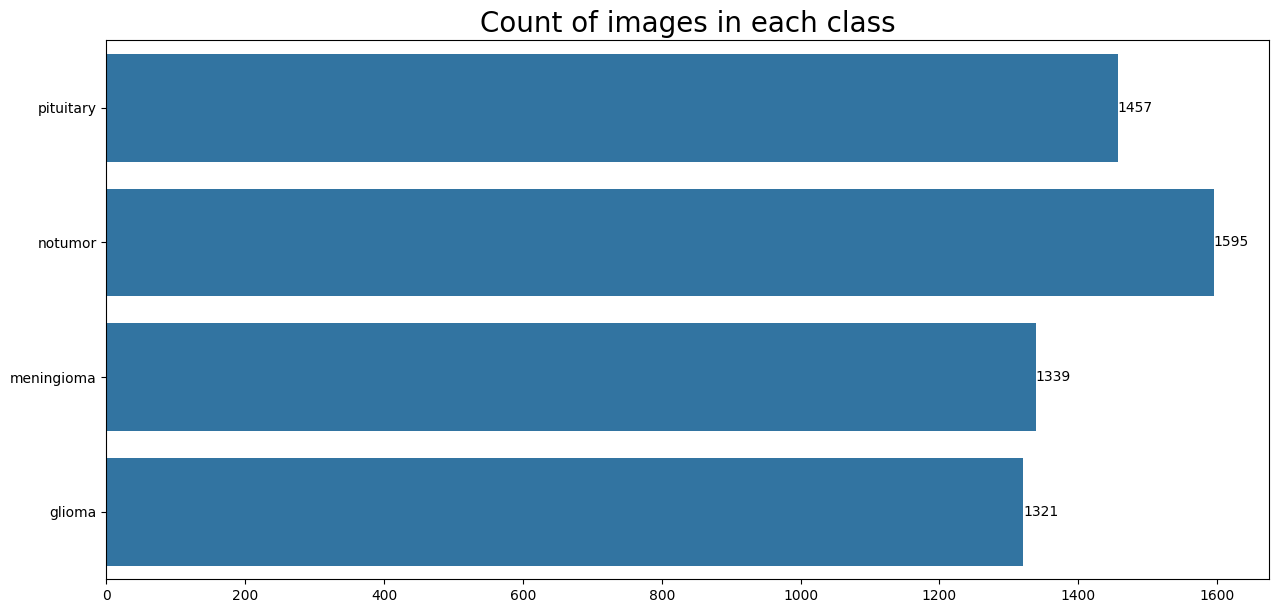

In [12]:
# Count of images in each class
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

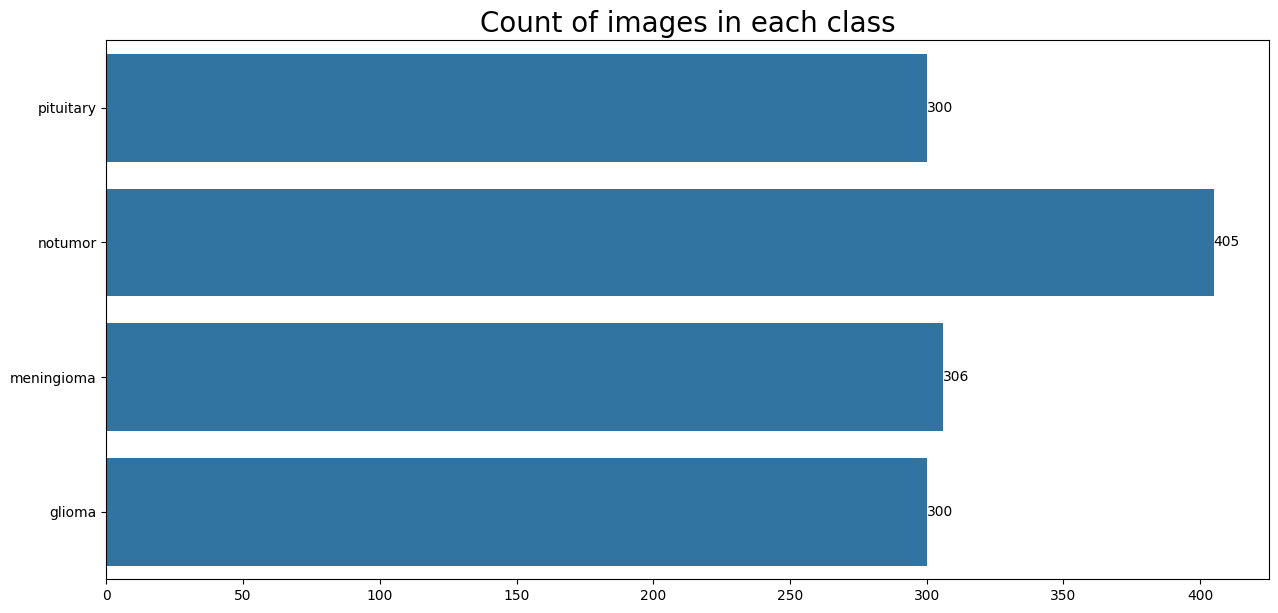

In [13]:
# Count of images in each class
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

## 2.2 Split data into train, test, valid

In [14]:
valid_df, ts_df = train_test_split(ts_df, train_size=.5, random_state=20)

In [15]:
valid_df

,Class Path,Class
464,./brain_tumor_mri_datasets/Testing/notumor/Te-...,notumor
988,./brain_tumor_mri_datasets/Testing/meningioma/...,meningioma
565,./brain_tumor_mri_datasets/Testing/notumor/Te-...,notumor
503,./brain_tumor_mri_datasets/Testing/notumor/Te-...,notumor
502,./brain_tumor_mri_datasets/Testing/notumor/Te-...,notumor
...,...,...
1242,./brain_tumor_mri_datasets/Testing/glioma/Te-g...,glioma
924,./brain_tumor_mri_datasets/Testing/meningioma/...,meningioma
1247,./brain_tumor_mri_datasets/Testing/glioma/Te-g...,glioma
271,./brain_tumor_mri_datasets/Testing/pituitary/T...,pituitary


## 2.3 Data preprocessing

In [16]:
batch_size = 16
img_size = (299,299)

tr_gen = ImageDataGenerator(brightness_range=(.8,1.2))

gen = ImageDataGenerator()


tr_gen = tr_gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                 y_col='Class',batch_size=batch_size,
                                 target_size=img_size)

valid_gen = gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                    y_col='Class',batch_size=batch_size,
                                    target_size=img_size)

ts_gen = gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                y_col='Class',batch_size=batch_size,
                                 target_size=img_size,shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [17]:
#gen.flow_from_dataframe?

## 2.4 Getting samples from data

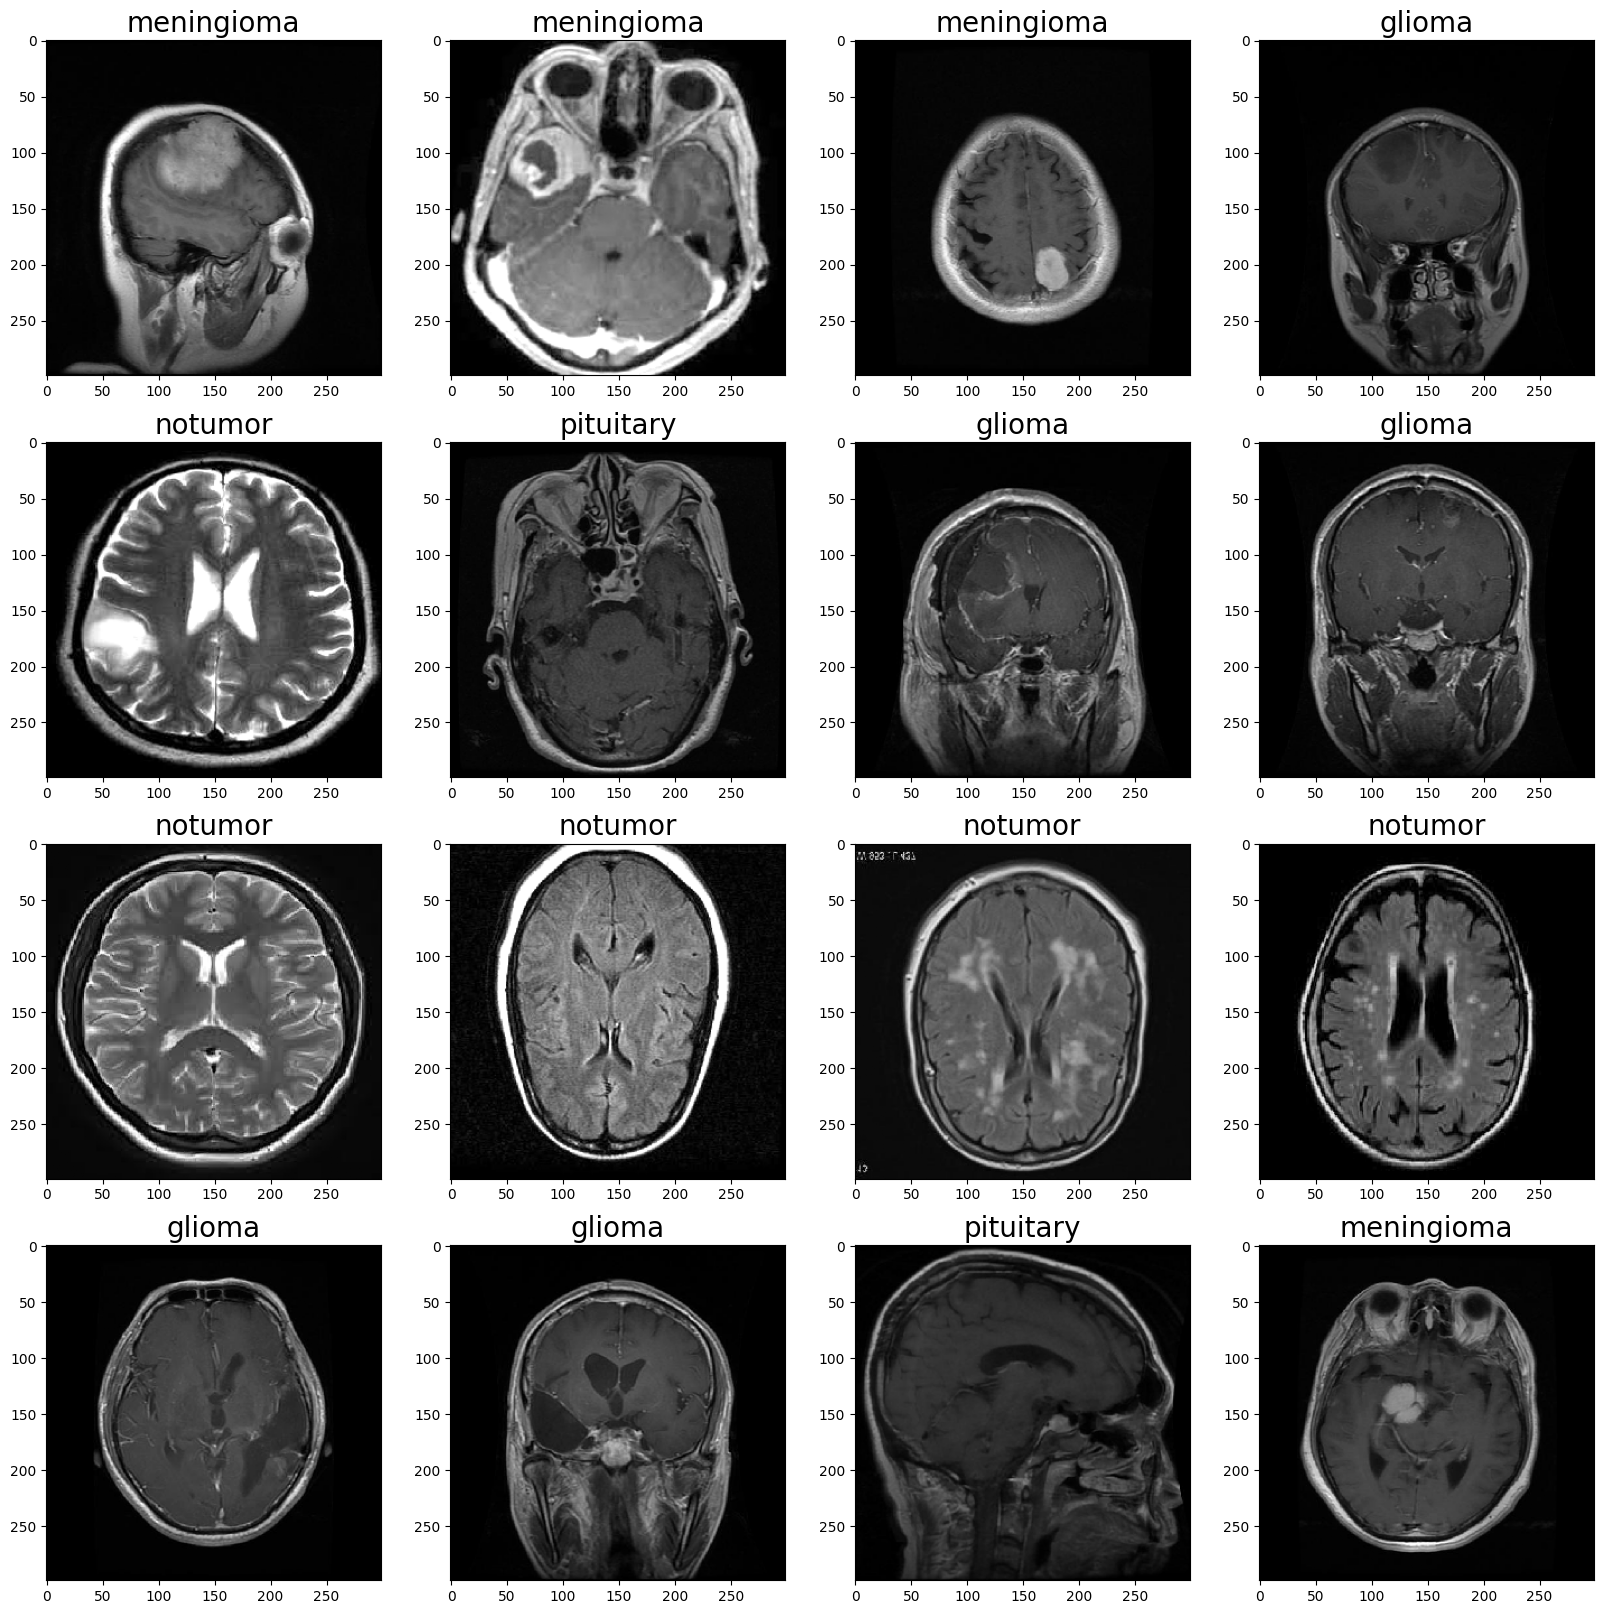

In [18]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(tr_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='k', fontsize=20)
plt.show()

In [19]:
#images

In [20]:
#class_dict

In [21]:
#labels

In [22]:
#gen??

# 3. Building Deep Learning Model

In [23]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                         

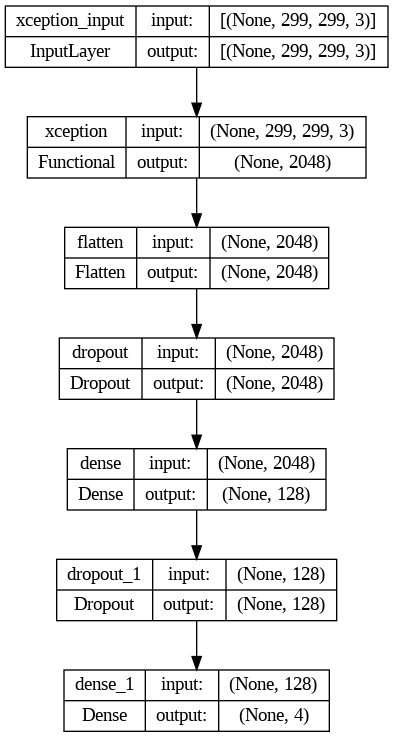

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True)

# 4. Training

In [25]:
hist = model.fit(tr_gen,
                 epochs=15,
                 validation_data=valid_gen,
                 shuffle= False)


Epoch 1/15
357/357 [==============================] - 100s 196ms/step - loss: 0.2930 - accuracy: 0.8993 - precision: 0.9293 - recall: 0.8724 - val_loss: 0.0509 - val_accuracy: 0.9878 - val_precision: 0.9938 - val_recall: 0.9847
Epoch 2/15
357/357 [==============================] - 68s 191ms/step - loss: 0.0662 - accuracy: 0.9797 - precision: 0.9814 - recall: 0.9776 - val_loss: 0.0583 - val_accuracy: 0.9847 - val_precision: 0.9847 - val_recall: 0.9817
Epoch 3/15
357/357 [==============================] - 68s 190ms/step - loss: 0.0392 - accuracy: 0.9891 - precision: 0.9898 - recall: 0.9881 - val_loss: 0.0262 - val_accuracy: 0.9954 - val_precision: 0.9954 - val_recall: 0.9954
Epoch 4/15
357/357 [==============================] - 68s 190ms/step - loss: 0.0267 - accuracy: 0.9932 - precision: 0.9935 - recall: 0.9923 - val_loss: 0.0124 - val_accuracy: 0.9954 - val_precision: 0.9954 - val_recall: 0.9954
Epoch 5/15
357/357 [==============================] - 68s 190ms/step - loss: 0.0186 - accur

In [26]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

## 4.1 Visualize model performance

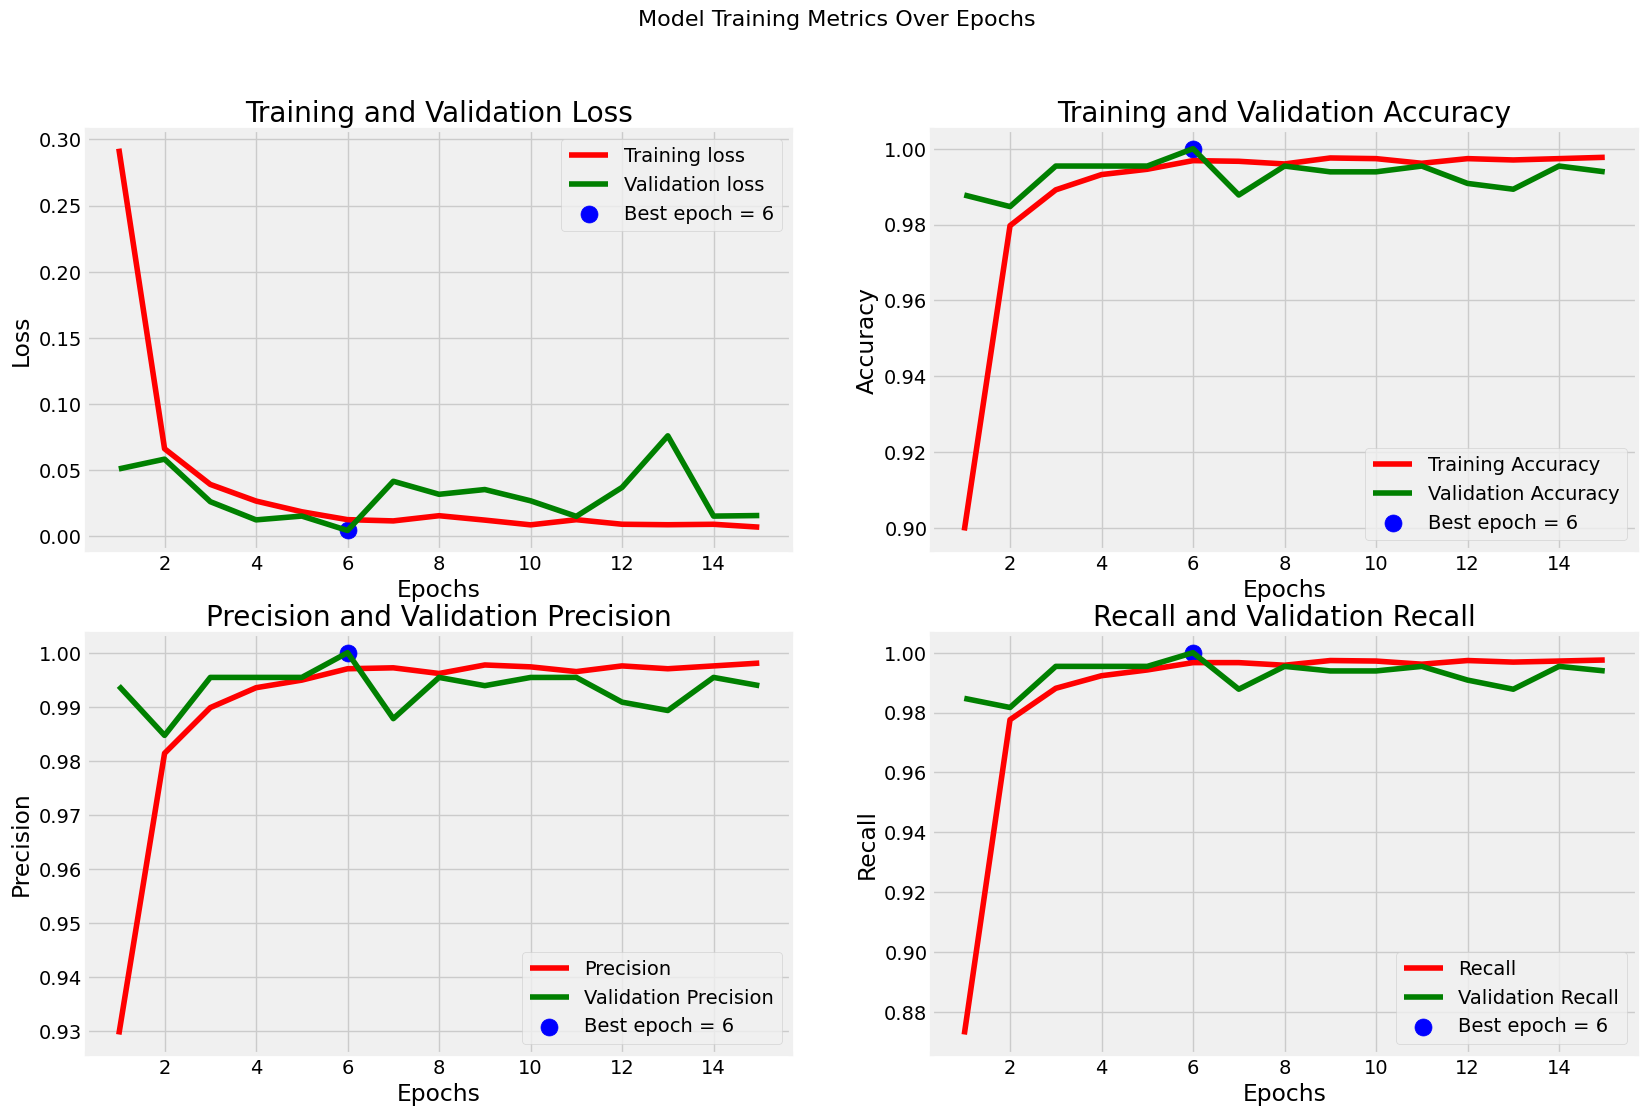

In [27]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

# 5. Testing and Evaluation

## 5.1 Evaluate

In [28]:
train_score = model.evaluate(tr_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(ts_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

41/41 [==============================] - 3s 60ms/step - loss: 0.0464 - accuracy: 0.9863 - precision: 0.9863 - recall: 0.9863
Train Loss:  0.001425961614586413
Train Accuracy:  0.9996498823165894
--------------------
Validation Loss:  0.015726927667856216
Validation Accuracy:  0.9938931465148926
--------------------
Test Loss:  0.04641690477728844
Test Accuracy:  0.9862805008888245


In [29]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 [==============================] - 3s 56ms/step


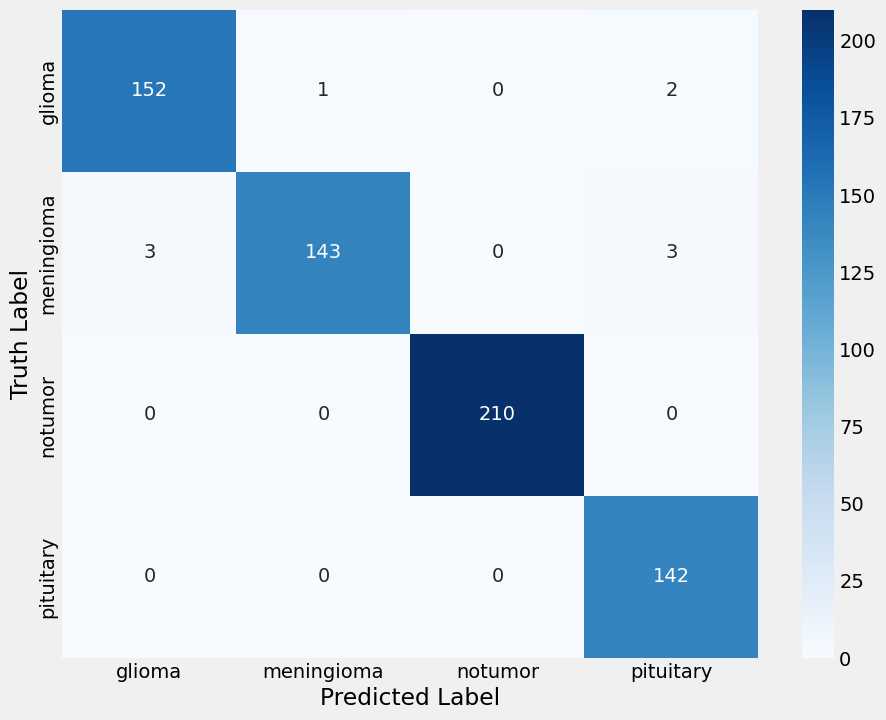

In [30]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [31]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       155
           1       0.99      0.96      0.98       149
           2       1.00      1.00      1.00       210
           3       0.97      1.00      0.98       142

    accuracy                           0.99       656
   macro avg       0.98      0.99      0.98       656
weighted avg       0.99      0.99      0.99       656



## 5.2 Testing

In [32]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    print('probs: ', probs)
    print('labels: ', labels)
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 [==============================] - 1s 1s/step
probs:  [3.3111333e-11, 1.0, 1.959789e-14, 1.781561e-11]
labels:  ['glioma', 'meningioma', 'notumor', 'pituitary']


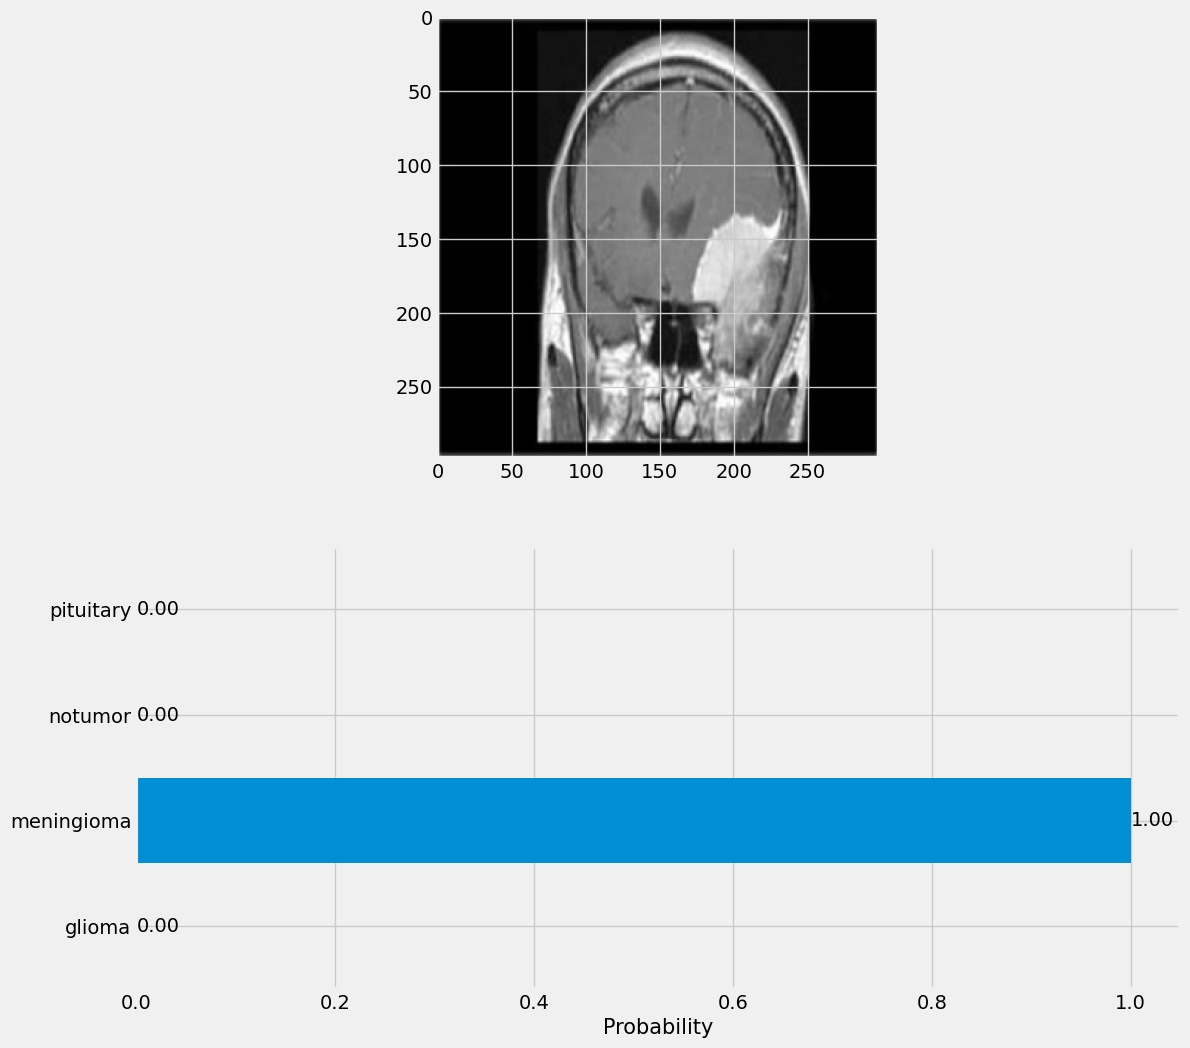

In [33]:
predict('./brain_tumor_mri_datasets/Testing/meningioma/Te-meTr_0000.jpg')

1/1 [==============================] - 0s 26ms/step
probs:  [1.0, 5.2543344e-16, 5.036477e-15, 4.1345708e-16]
labels:  ['glioma', 'meningioma', 'notumor', 'pituitary']


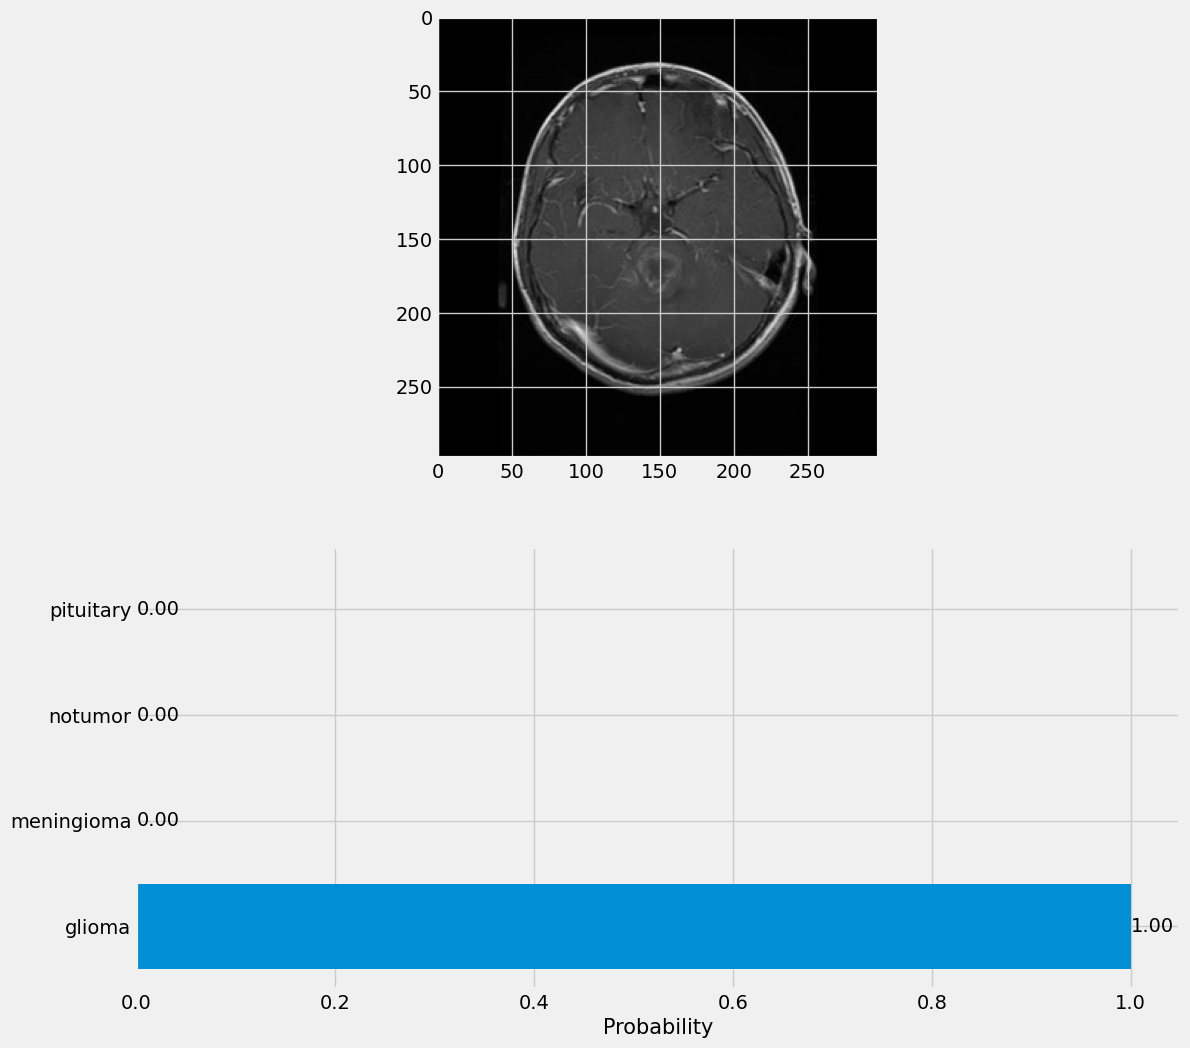

In [34]:
predict('./brain_tumor_mri_datasets/Testing/glioma/Te-glTr_0007.jpg')

In [37]:
# Save the model
# model.save('brain_tumor_model.pkl')
# Save the model to a file
model.save("brain_tumor_model.h5")


In [38]:
from flask import Flask, jsonify, request

# Load the model in Flask
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    input_data = data['input']
    input_data = np.array(input_data).reshape(1, -1)

    # Load the model
    loaded_model = tf.keras.models.load_model("brain_tumor_model.h5")

    # Make predictions
    predictions = loaded_model.predict(input_data)

    return jsonify({'prediction': predictions.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [40]:
!zip -r ./brain_tumor_model.pkl.zip ./brain_tumor_model.pkl

  adding: brain_tumor_model.pkl/ (stored 0%)
  adding: brain_tumor_model.pkl/keras_metadata.pb (deflated 96%)
  adding: brain_tumor_model.pkl/fingerprint.pb (stored 0%)
  adding: brain_tumor_model.pkl/saved_model.pb (deflated 91%)
  adding: brain_tumor_model.pkl/assets/ (stored 0%)
  adding: brain_tumor_model.pkl/variables/ (stored 0%)
  adding: brain_tumor_model.pkl/variables/variables.index (deflated 77%)
  adding: brain_tumor_model.pkl/variables/variables.data-00000-of-00001 (deflated 8%)
